In [ ]:
library(ggplot2)
library(dplyr)
library(plotly)
library(lubridate )


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
df <- read.csv('NetflixOriginals.csv')
head(df)

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
2,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
3,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
4,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
5,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
6,Drive,Action,"November 1, 2019",147,3.5,Hindi


In [ ]:
str(df)

'data.frame':	584 obs. of  6 variables:
 $ Title     : chr  "Enter the Anime" "Dark Forces" "The App" "The Open House" ...
 $ Genre     : chr  "Documentary" "Thriller" "Science fiction/Drama" "Horror thriller" ...
 $ Premiere  : chr  "August 5, 2019" "August 21, 2020" "December 26, 2019" "January 19, 2018" ...
 $ Runtime   : int  58 81 79 94 90 147 112 149 73 139 ...
 $ IMDB_Score: num  2.5 2.6 2.6 3.2 3.4 3.5 3.7 3.7 3.9 4.1 ...
 $ Language  : chr  "English/Japanese" "Spanish" "Italian" "English" ...


In [ ]:
summary(df)

    Title              Genre             Premiere            Runtime      
 Length:584         Length:584         Length:584         Min.   :  4.00  
 Class :character   Class :character   Class :character   1st Qu.: 86.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 97.00  
                                                          Mean   : 93.58  
                                                          3rd Qu.:108.00  
                                                          Max.   :209.00  
   IMDB_Score      Language        
 Min.   :2.500   Length:584        
 1st Qu.:5.700   Class :character  
 Median :6.350   Mode  :character  
 Mean   :6.272                     
 3rd Qu.:7.000                     
 Max.   :9.000                     

In [ ]:
sum(is.na(df))

[1] 0

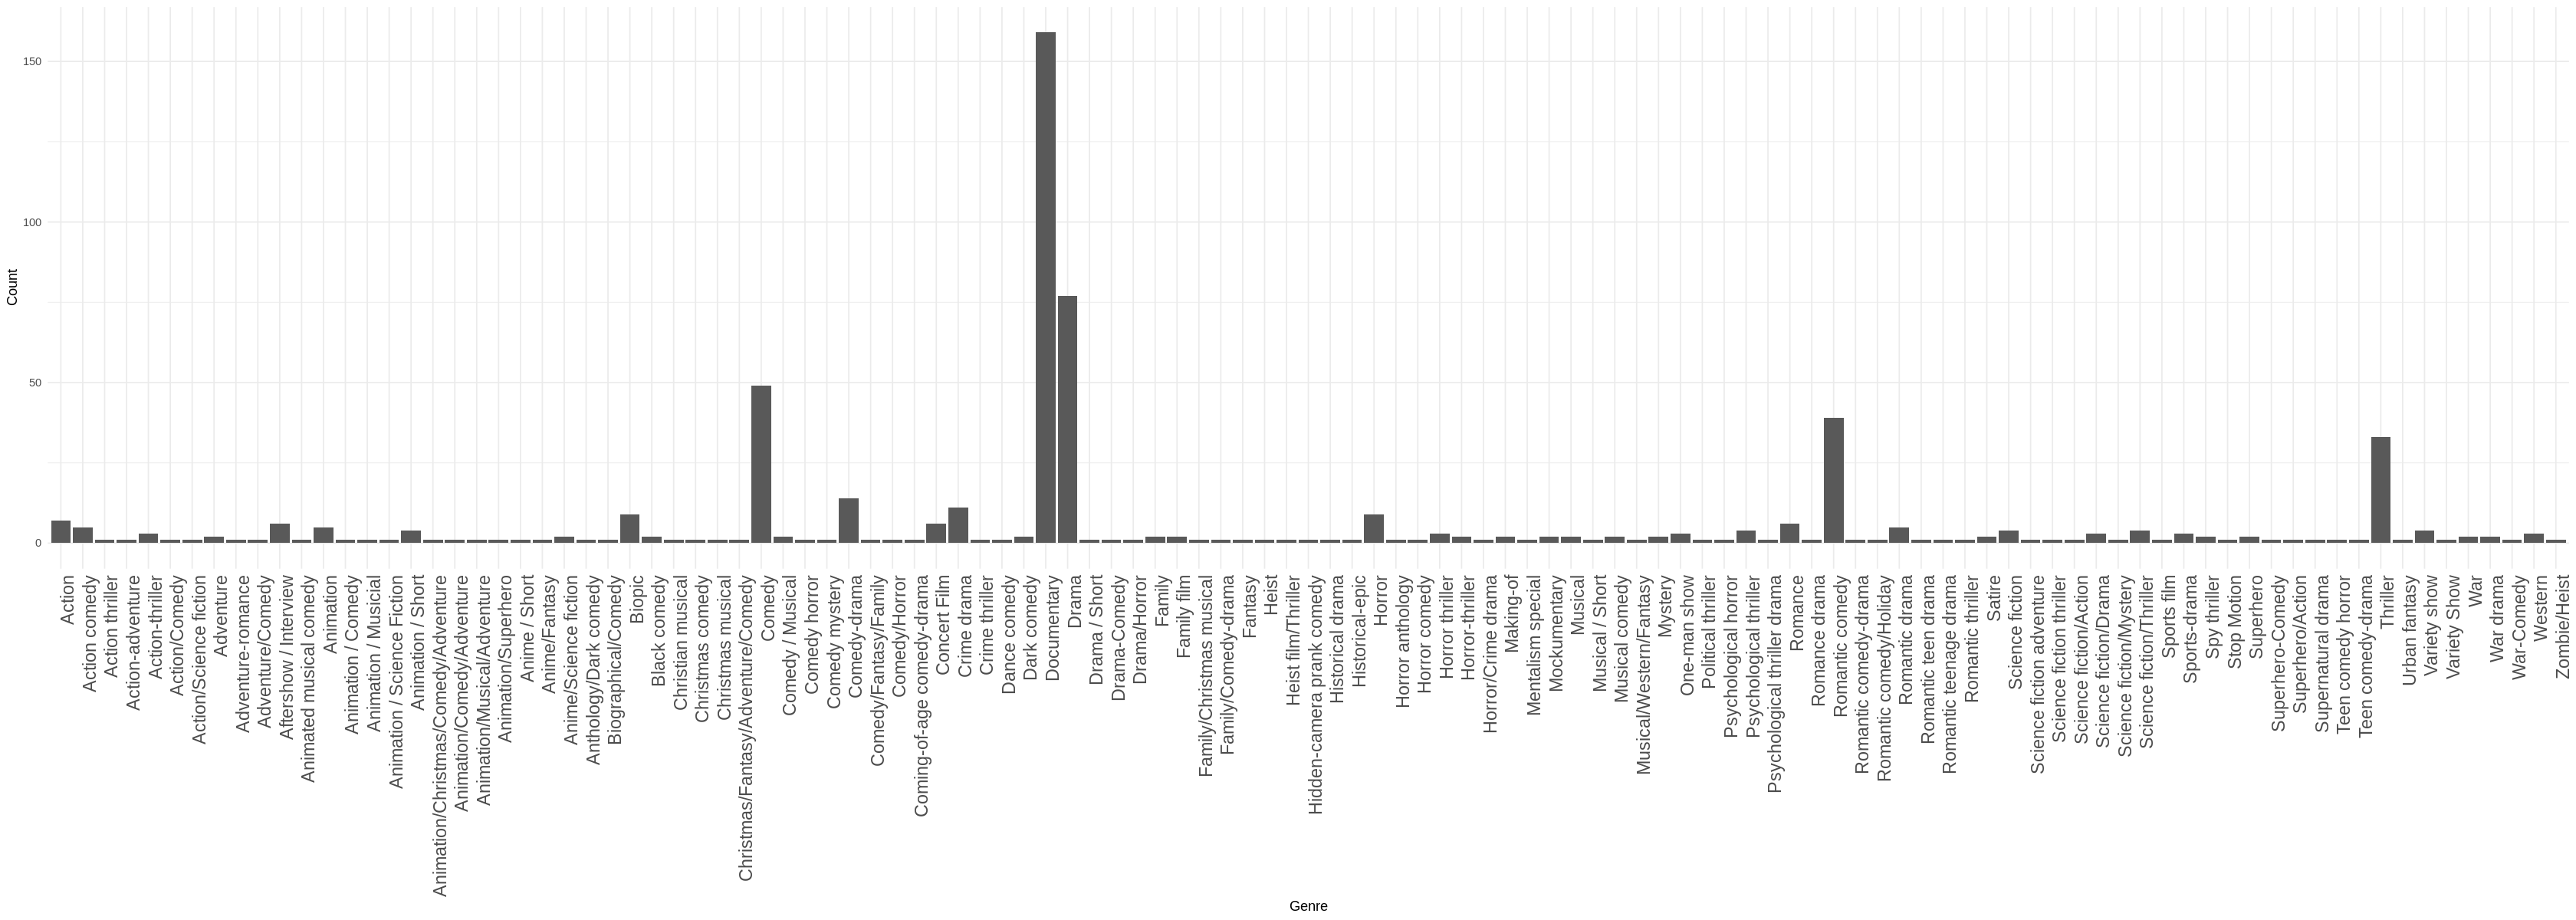

In [ ]:
# Set global options for plot size
options(repr.plot.width = 28, repr.plot.height = 10)

#calculates the frequency counts of different Genre in the dataframe
genre_counts <- table(df$Genre)

# Create a bar plot
p <- ggplot(data.frame(Genre = names(genre_counts), Count = as.numeric(genre_counts)),
            aes(x = Genre, y = Count)) +
  geom_bar(stat = "identity") +
  labs(x = "Genre", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 14))   # Adjust font size here

# Print the plot
print(p)

-Top genres fall in Documentary, Drama, Comedy, Romantic comedy & Thriller.

-Also, we can say that the most popular category is documentary.

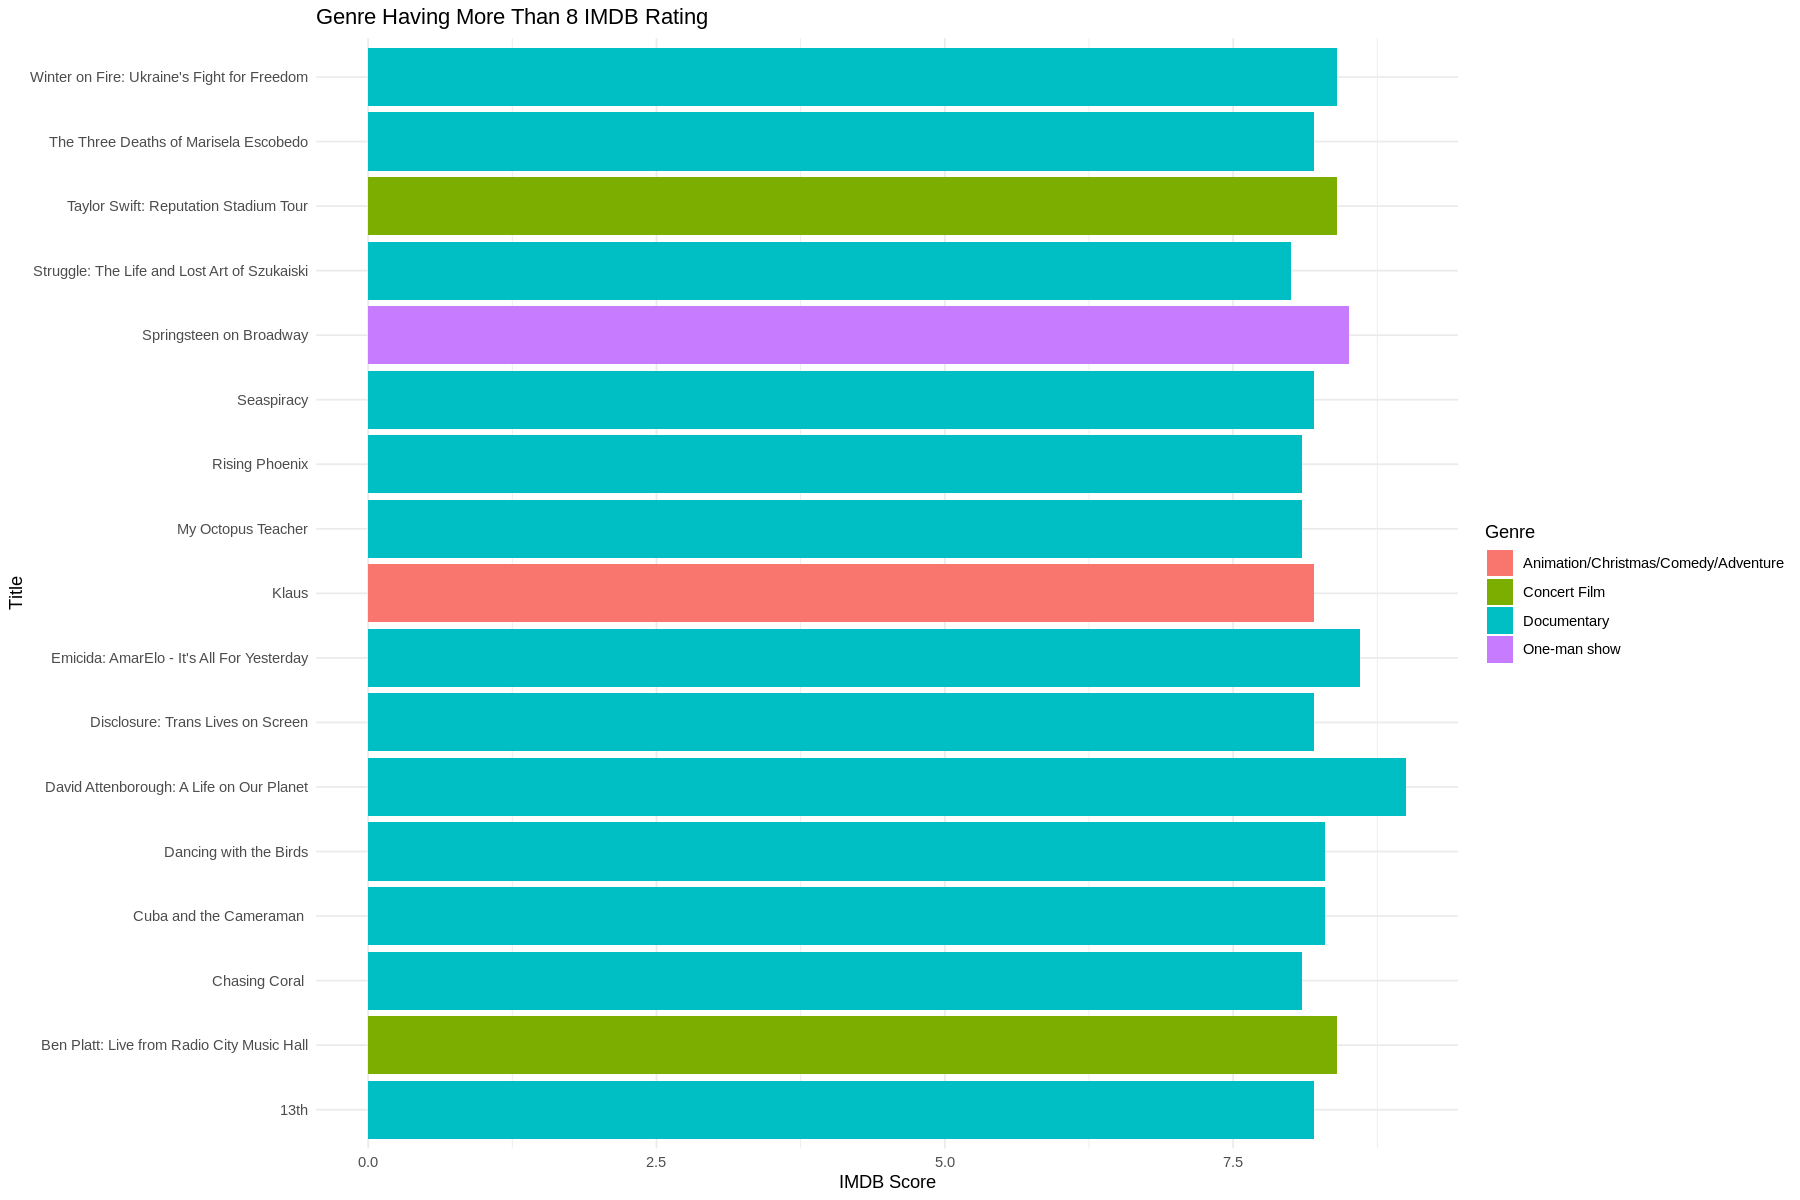

In [ ]:
# Set global options for plot size
options(repr.plot.width =15, repr.plot.height =10)

# filtering IMDB_Score
score_8 <- df %>% filter(IMDB_Score >= 8)

# Create a bar plot
p <- ggplot(score_8, aes(x = IMDB_Score, y = Title, fill = Genre)) +
  geom_bar(stat = "identity") +
  labs(title = 'Genre Having More Than 8 IMDB Rating', x = "IMDB Score", y = "Title") +
  theme_minimal() + #applies a minimalistic theme to the plot.
  theme(legend.position = "right", )

# Print the plot
print(p)

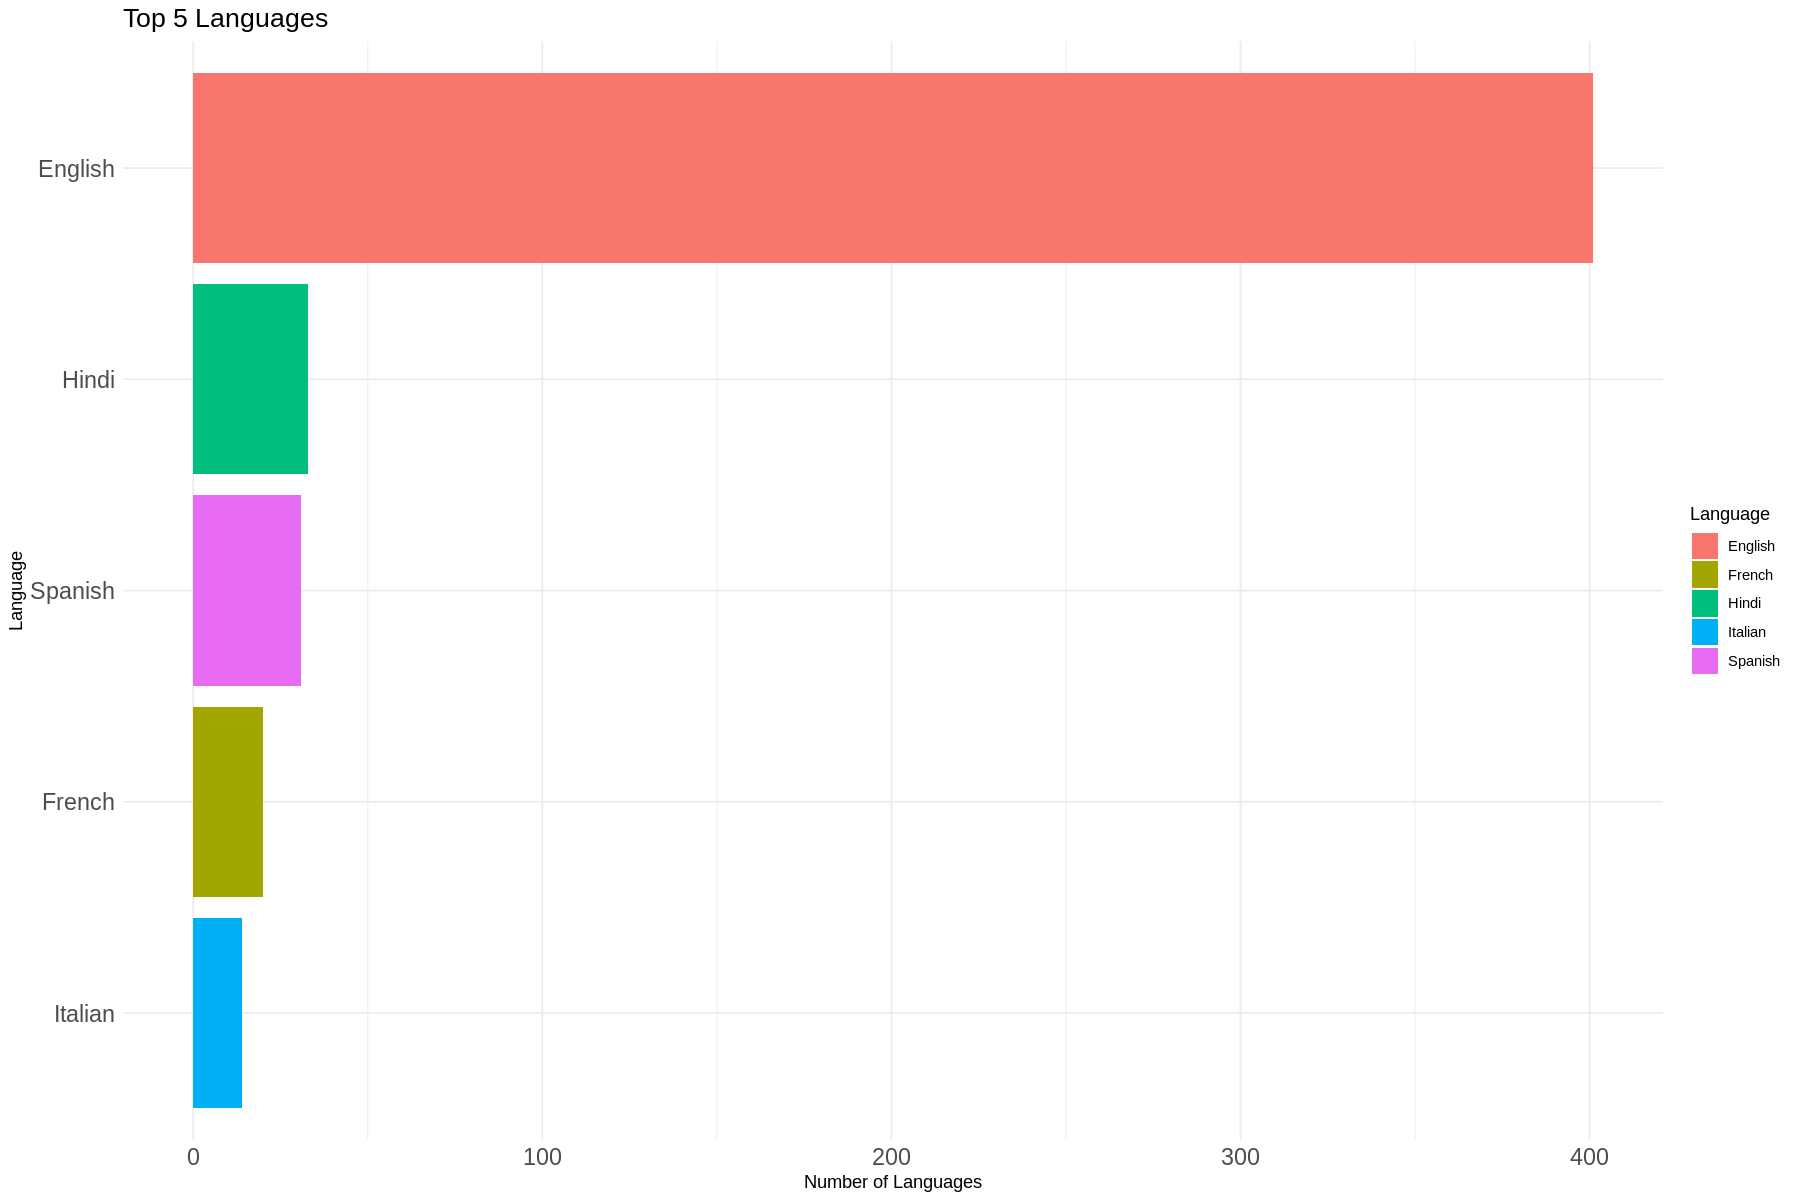

In [ ]:
#calculates the frequency counts of different languages in the dataframe df.
df_lang <- table(df$Language)

# Sort the language counts and keep the top 5
top_lang <- head(sort(df_lang, decreasing = TRUE), 5)

# Create a horizontal bar plot
p <- ggplot(data.frame(Language = names(top_lang), Count = as.numeric(top_lang)),
            aes(x = Count, #maps the counts to the x-axis.
            y = reorder(Language, Count), #The reorder() function arranges the languages by count in ascending/descending order.
            fill = Language)) +
     geom_bar(stat = "identity", orientation = "y") +
     labs(title = 'Top 5 Languages', x = "Number of Languages", y = "Language") +
     theme_minimal() +
     theme(axis.text.x = element_text(size = 14),
           axis.text.y = element_text(size = 14),
           plot.title = element_text(size = 16))

# Print the plot
print(p)


- We can say that english is most popular language on netflix.

- Also, it has high runtime.

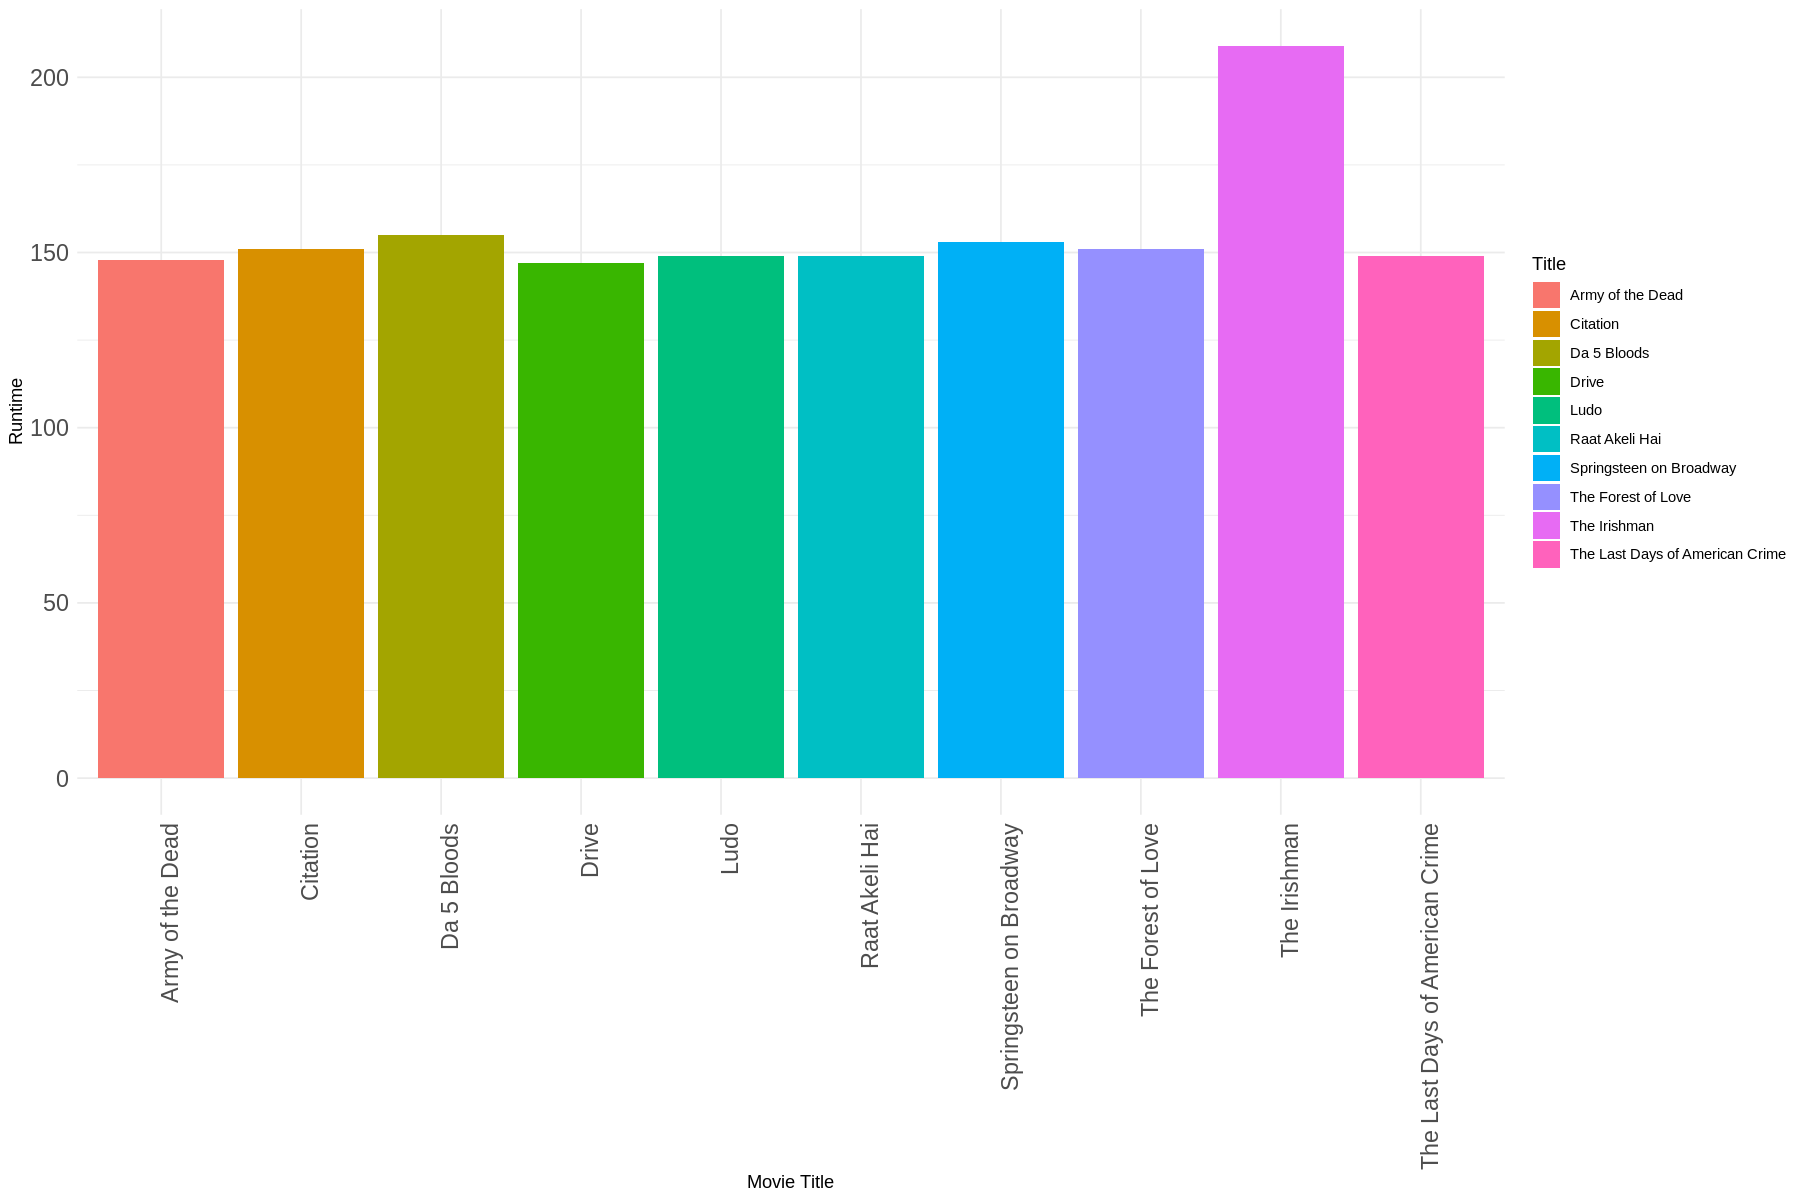

In [ ]:
df_subset <- df[c("Title", "Runtime")]
df_sorted <- df_subset[order(-df_subset$Runtime), ] #sorts the subset of the dataframe based on the 'Runtime' column in descending order.
top_10 <- head(df_sorted, 10)

# Create a horizontal bar plot
p <- ggplot(top_10, aes(x = Title, y = Runtime, fill = Title)) +
     geom_bar(stat = "identity") +
     labs(x = "Movie Title", y = "Runtime") +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 14),
           axis.text.y = element_text(size = 14),
           plot.title = element_text(size = 16))

# Print the plot
print(p)

In [ ]:
df_date <- df

# Assuming ds_date is your dataframe
df_date <- df_date %>%
  mutate(Premiere = gsub("\\.", ",", Premiere),
         PremiereDate = as.Date(df$Premiere, format = "%Y/%m/%d"),
         Year = format(PremiereDate, "%Y") )
head(df_date)

,Title,Genre,Premiere,Runtime,IMDB_Score,Language,PremiereDate,Year
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<date>,<chr>
1,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019-08-05,2019
2,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020-08-21,2020
3,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019-12-26,2019
4,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018-01-19,2018
5,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020-10-30,2020
6,Drive,Action,2019-11-01,147,3.5,Hindi,2019-11-01,2019


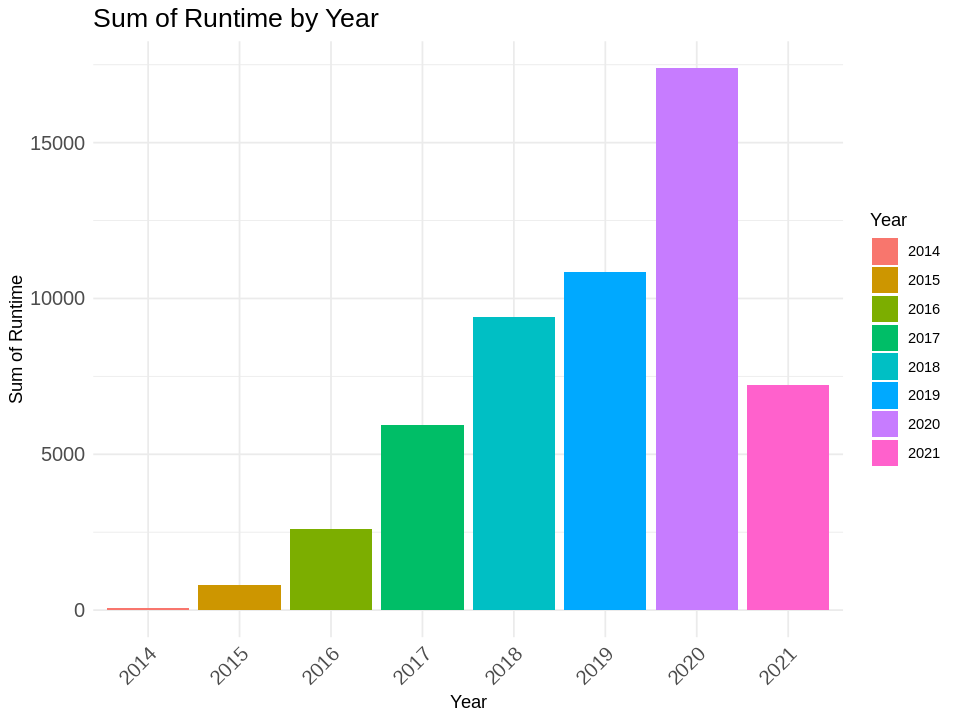

In [ ]:

# Assuming ds_date is your dataframe
df_sum_runtime <- df_date %>%
  group_by(Year) %>%
  summarise(`Sum of Runtime` = sum(Runtime)) %>%
  arrange(desc(`Sum of Runtime`))

# Set the plot size
options(repr.plot.width = 8, repr.plot.height = 6)

# Create a bar plot
p <- ggplot(df_sum_runtime, aes(x = Year, y = `Sum of Runtime`, fill = Year)) +
     geom_bar(stat = "identity") +
     labs(title = "Sum of Runtime by Year",
          x = "Year",
          y = "Sum of Runtime") +
     theme_minimal() +
     theme(plot.title = element_text(size = 16),
           axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
           axis.text.y = element_text(size = 12))

# Print the plot
print(p)


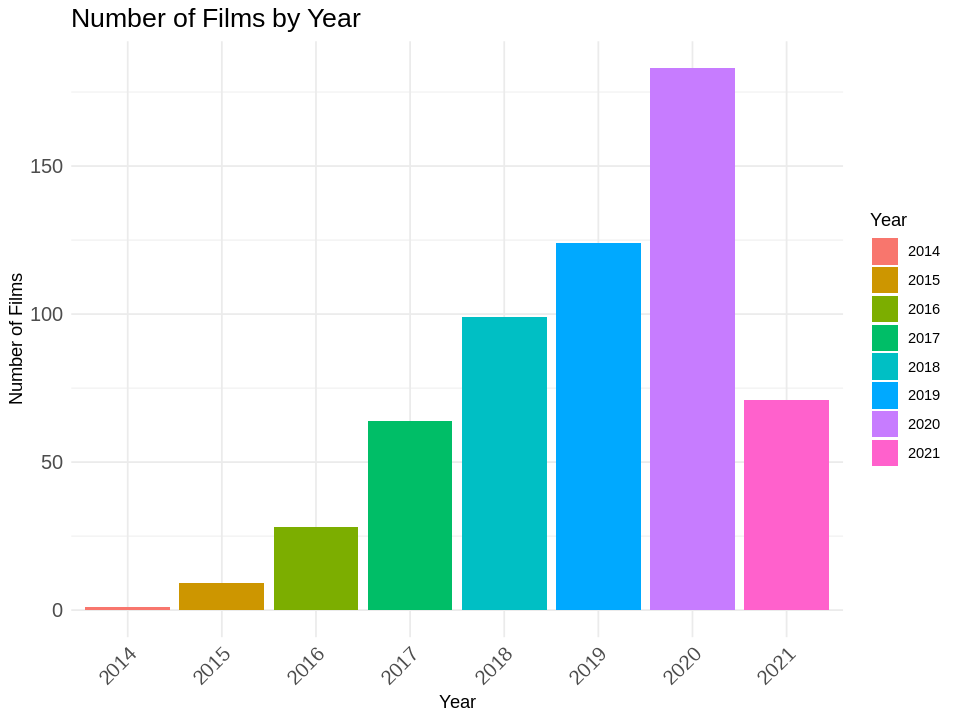

In [ ]:
# Assuming ds_date is your dataframe
df_count_title <- df_date %>%
  group_by(Year) %>%
  summarise(`Number of Film` = n()) %>%
  arrange(desc(`Number of Film`))

# Set the plot size
options(repr.plot.width = 8, repr.plot.height = 6)

# Create a bar plot
p <- ggplot(df_count_title, aes(x = Year, y = `Number of Film`, fill = Year)) +
     geom_bar(stat = "identity", position = "dodge") +
     labs(title = "Number of Films by Year",
          x = "Year",
          y = "Number of Films") +
     theme_minimal() +
     theme(plot.title = element_text(size = 16),
           axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
           axis.text.y = element_text(size = 12))

# Print the plot
print(p)


In [ ]:
df_date$Year

[1] "2019" "2020" "2019" "2018" "2020" "2019" "2020" "2020" "2018" "2021"
 [11] "2021" "2020" "2020" "2020" "2016" "2019" "2020" "2020" "2021" "2017"
 [21] "2019" "2019" "2019" "2021" "2021" "2020" "2021" "2020" "2021" "2018"
 [31] "2019" "2016" "2019" "2019" "2019" "2020" "2020" "2020" "2019" "2021"
 [41] "2020" "2020" "2020" "2020" "2017" "2020" "2020" "2017" "2020" "2015"
 [51] "2020" "2020" "2019" "2020" "2020" "2018" "2020" "2016" "2021" "2020"
 [61] "2017" "2020" "2018" "2021" "2020" "2017" "2019" "2020" "2020" "2018"
 [71] "2019" "2021" "2017" "2017" "2020" "2018" "2019" "2017" "2019" "2019"
 [81] "2021" "2019" "2020" "2018" "2018" "2019" "2020" "2020" "2020" "2018"
 [91] "2021" "2018" "2019" "2016" "2020" "2019" "2019" "2020" "2020" "2018"
[101] "2020" "2019" "2021" "2017" "2021" "2020" "2020" "2015" "2018" "2019"
[111] "2021" NA     "2019" "2019" "2020" "2018" "2020" "2021" "2021" "2018"
[121] "2018" "2019" "2018" "2018" "2019" "2019" "2017" "2016" "2021" "2019"
[131] "2018" "2020" "2020" "2020" "2019" "2021" "2020" "2020" "2020" "2020"
[141] "2021" "2021" "2021" "2017" "2020" "2017" "2019" "2020" "2019" "2019"
[151] "2017" "2020" "2018" "2019" "2021" "2016" "2018" "2021" "2020" "2019"
[161] "2021" "2019" "2020" "2017" "2020" "2019" "2016" "2018" "2020" "2020"
[171] "2018" "2018" "2021" "2019" "2016" "2020" "2018" "2020" "2020" "2017"
[181] "2018" "2017" "2016" "2018" "2018" "2020" "2020" "2020" "2019" "2020"
[191] "2020" "2018" "2020" "2018" "2021" "2018" "2019" "2019" "2020" "2018"
[201] "2020" "2020" "2021" "2018" "2020" "2016" "2020" "2018" "2018" "2017"
[211] "2019" "2019" "2019" "2020" "2020" "2020" "2018" "2018" "2020" "2017"
[221] "2019" "2019" "2017" "2017" "2017" "2021" "2020" "2019" "2015" "2018"
[231] "2020" "2019" "2016" "2020" "2020" "2021" "2021" "2017" "2020" "2017"
[241] "2019" "2021" "2020" "2020" "2020" "2021" "2021" "2020" "2020" "2021"
[251] "2019" "2019" "2020" "2020" "2020" "2018" "2019" "2020" "2018" "2018"
[261] "2017" "2017" "2017" "2019" "2018" "2018" "2018" "2017" "2018" "2021"
[271] "2020" "2021" "2018" "2021" "2019" "2021" "2020" "2019" "2018" "2017"
[281] "2017" "2016" "2017" "2017" "2019" "2019" "2019" "2018" "2020" "2021"
[291] "2019" "2020" "2020" "2020" "2016" "2019" "2019" "2018" "2019" "2018"
[301] "2020" "2020" "2021" "2020" "2014" "2018" "2020" "2019" NA     "2019"
[311] "2018" "2021" "2017" "2020" "2020" "2019" "2018" "2019" "2017" "2018"
[321] "2019" "2020" "2020" "2020" "2019" "2020" "2021" "2019" "2020" "2021"
[331] "2020" "2017" "2020" "2020" "2019" "2018" "2021" "2018" "2020" "2017"
[341] "2021" "2018" "2017" "2020" "2017" "2020" "2021" "2018" "2020" "2021"
[351] "2019" "2016" "2020" "2019" "2021" "2018" "2018" "2020" "2021" "2018"
[361] "2018" "2020" "2019" "2021" "2020" "2021" "2021" "2019" "2017" "2021"
[371] "2017" "2021" "2020" "2020" "2020" "2020" "2017" "2020" "2019" "2021"
[381] "2017" "2021" "2021" "2021" "2019" "2016" "2020" NA     "2019" "2018"
[391] "2016" "2018" "2020" "2020" "2019" "2019" "2020" "2018" "2018" "2020"
[401] "2020" "2020" "2017" "2018" "2017" "2020" "2020" "2020" "2020" "2018"
[411] "2018" "2017" "2021" "2020" "2016" "2020" "2021" "2020" "2017" "2017"
[421] "2020" "2017" "2018" "2021" "2018" "2018" "2020" "2020" "2020" "2019"
[431] "2019" "2017" "2018" "2017" "2020" "2017" "2019" "2019" "2020" "2020"
[441] "2021" "2021" "2019" "2019" "2019" "2017" "2019" "2020" "2018" "2019"
[451] "2018" "2017" "2018" "2020" "2019" "2020" "2020" "2018" "2019" "2018"
[461] "2019" "2021" "2019" "2020" "2017" "2015" "2019" "2018" "2016" "2017"
[471] "2021" "2018" "2018" "2020" "2020" "2021" "2019" "2021" "2018" "2020"
[481] "2016" "2017" "2019" "2016" "2020" "2018" "2018" "2019" "2018" "2019"
[491] "2018" "2019" "2020" "2021" "2019" "2019" "2019" "2016" "2018" "2019"
[501] "2019" "2016" "2020" "2017" "2020" "2020" "2020" "2017" "2018" "2020"
[511] "2019" "2019" "2020" "2020" "2016" "2016" "2018" "2017" "2016" "2015"
[521] "2019" "2019" "2017" "2020" "2019" "2020" "2

In [ ]:
str(df_date)

'data.frame':	584 obs. of  8 variables:
 $ Title       : chr  "Enter the Anime" "Dark Forces" "The App" "The Open House" ...
 $ Genre       : chr  "Documentary" "Thriller" "Science fiction/Drama" "Horror thriller" ...
 $ Premiere    : chr  "2019-08-05" "2020-08-21" "2019-12-26" "2018-01-19" ...
 $ Runtime     : int  58 81 79 94 90 147 112 149 73 139 ...
 $ IMDB_Score  : num  2.5 2.6 2.6 3.2 3.4 3.5 3.7 3.7 3.9 4.1 ...
 $ Language    : chr  "English/Japanese" "Spanish" "Italian" "English" ...
 $ PremiereDate: Date, format: "2019-08-05" "2020-08-21" ...
 $ Year        : chr  "2019" "2020" "2019" "2018" ...


In [ ]:
df_date <- na.omit(df_date)

In [ ]:
df_date$Year

[1] "2019" "2020" "2019" "2018" "2020" "2019" "2020" "2020" "2018" "2021"
 [11] "2021" "2020" "2020" "2020" "2016" "2019" "2020" "2020" "2021" "2017"
 [21] "2019" "2019" "2019" "2021" "2021" "2020" "2021" "2020" "2021" "2018"
 [31] "2019" "2016" "2019" "2019" "2019" "2020" "2020" "2020" "2019" "2021"
 [41] "2020" "2020" "2020" "2020" "2017" "2020" "2020" "2017" "2020" "2015"
 [51] "2020" "2020" "2019" "2020" "2020" "2018" "2020" "2016" "2021" "2020"
 [61] "2017" "2020" "2018" "2021" "2020" "2017" "2019" "2020" "2020" "2018"
 [71] "2019" "2021" "2017" "2017" "2020" "2018" "2019" "2017" "2019" "2019"
 [81] "2021" "2019" "2020" "2018" "2018" "2019" "2020" "2020" "2020" "2018"
 [91] "2021" "2018" "2019" "2016" "2020" "2019" "2019" "2020" "2020" "2018"
[101] "2020" "2019" "2021" "2017" "2021" "2020" "2020" "2015" "2018" "2019"
[111] "2021" "2019" "2019" "2020" "2018" "2020" "2021" "2021" "2018" "2018"
[121] "2019" "2018" "2018" "2019" "2019" "2017" "2016" "2021" "2019" "2018"
[131] "2020" "2020" "2020" "2019" "2021" "2020" "2020" "2020" "2020" "2021"
[141] "2021" "2021" "2017" "2020" "2017" "2019" "2020" "2019" "2019" "2017"
[151] "2020" "2018" "2019" "2021" "2016" "2018" "2021" "2020" "2019" "2021"
[161] "2019" "2020" "2017" "2020" "2019" "2016" "2018" "2020" "2020" "2018"
[171] "2018" "2021" "2019" "2016" "2020" "2018" "2020" "2020" "2017" "2018"
[181] "2017" "2016" "2018" "2018" "2020" "2020" "2020" "2019" "2020" "2020"
[191] "2018" "2020" "2018" "2021" "2018" "2019" "2019" "2020" "2018" "2020"
[201] "2020" "2021" "2018" "2020" "2016" "2020" "2018" "2018" "2017" "2019"
[211] "2019" "2019" "2020" "2020" "2020" "2018" "2018" "2020" "2017" "2019"
[221] "2019" "2017" "2017" "2017" "2021" "2020" "2019" "2015" "2018" "2020"
[231] "2019" "2016" "2020" "2020" "2021" "2021" "2017" "2020" "2017" "2019"
[241] "2021" "2020" "2020" "2020" "2021" "2021" "2020" "2020" "2021" "2019"
[251] "2019" "2020" "2020" "2020" "2018" "2019" "2020" "2018" "2018" "2017"
[261] "2017" "2017" "2019" "2018" "2018" "2018" "2017" "2018" "2021" "2020"
[271] "2021" "2018" "2021" "2019" "2021" "2020" "2019" "2018" "2017" "2017"
[281] "2016" "2017" "2017" "2019" "2019" "2019" "2018" "2020" "2021" "2019"
[291] "2020" "2020" "2020" "2016" "2019" "2019" "2018" "2019" "2018" "2020"
[301] "2020" "2021" "2020" "2014" "2018" "2020" "2019" "2019" "2018" "2021"
[311] "2017" "2020" "2020" "2019" "2018" "2019" "2017" "2018" "2019" "2020"
[321] "2020" "2020" "2019" "2020" "2021" "2019" "2020" "2021" "2020" "2017"
[331] "2020" "2020" "2019" "2018" "2021" "2018" "2020" "2017" "2021" "2018"
[341] "2017" "2020" "2017" "2020" "2021" "2018" "2020" "2021" "2019" "2016"
[351] "2020" "2019" "2021" "2018" "2018" "2020" "2021" "2018" "2018" "2020"
[361] "2019" "2021" "2020" "2021" "2021" "2019" "2017" "2021" "2017" "2021"
[371] "2020" "2020" "2020" "2020" "2017" "2020" "2019" "2021" "2017" "2021"
[381] "2021" "2021" "2019" "2016" "2020" "2019" "2018" "2016" "2018" "2020"
[391] "2020" "2019" "2019" "2020" "2018" "2018" "2020" "2020" "2020" "2017"
[401] "2018" "2017" "2020" "2020" "2020" "2020" "2018" "2018" "2017" "2021"
[411] "2020" "2016" "2020" "2021" "2020" "2017" "2017" "2020" "2017" "2018"
[421] "2021" "2018" "2018" "2020" "2020" "2020" "2019" "2019" "2017" "2018"
[431] "2017" "2020" "2017" "2019" "2019" "2020" "2020" "2021" "2021" "2019"
[441] "2019" "2019" "2017" "2019" "2020" "2018" "2019" "2018" "2017" "2018"
[451] "2020" "2019" "2020" "2020" "2018" "2019" "2018" "2019" "2021" "2019"
[461] "2020" "2017" "2015" "2019" "2018" "2016" "2017" "2021" "2018" "2018"
[471] "2020" "2020" "2021" "2019" "2021" "2018" "2020" "2016" "2017" "2019"
[481] "2016" "2020" "2018" "2018" "2019" "2018" "2019" "2018" "2019" "2020"
[491] "2021" "2019" "2019" "2019" "2016" "2018" "2019" "2019" "2016" "2020"
[501] "2017" "2020" "2020" "2020" "2017" "2018" "2020" "2019" "2019" "2020"
[511] "2020" "2016" "2016" "2018" "2017" "2016" "2015" "2019" "2019" "2017"
[521] "2020" "2019" "2020" "2018" "2019" "2019" "2

In [ ]:
str(df_date)

'data.frame':	579 obs. of  8 variables:
 $ Title       : chr  "Enter the Anime" "Dark Forces" "The App" "The Open House" ...
 $ Genre       : chr  "Documentary" "Thriller" "Science fiction/Drama" "Horror thriller" ...
 $ Premiere    : chr  "2019-08-05" "2020-08-21" "2019-12-26" "2018-01-19" ...
 $ Runtime     : int  58 81 79 94 90 147 112 149 73 139 ...
 $ IMDB_Score  : num  2.5 2.6 2.6 3.2 3.4 3.5 3.7 3.7 3.9 4.1 ...
 $ Language    : chr  "English/Japanese" "Spanish" "Italian" "English" ...
 $ PremiereDate: Date, format: "2019-08-05" "2020-08-21" ...
 $ Year        : chr  "2019" "2020" "2019" "2018" ...
 - attr(*, "na.action")= 'omit' Named int [1:5] 112 309 388 539 542
  ..- attr(*, "names")= chr [1:5] "112" "309" "388" "539" ...
